<a href="https://colab.research.google.com/github/UBC-Astrophysics/QEDSurface/blob/master/magnetar.py/O-Mode_Scattering_Cool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the entire repository

In [1]:
# Get the entire archive (maybe you already have it)
#! git clone https://github.com/UBC-Astrophysics/QEDSurface.git

In [2]:
# change the directory if you have to
#import os
#os.chdir('QEDSurface/magnetar.py')


In [3]:
# update just in case
# git pull

# Load Libraries

In [4]:
import Magnetar
import numpy as np


import matplotlib.pyplot as plt

# Create the double black-body surface map

## Put in the surface maps using the dipole pattern

In [5]:
import glob
#mysurfmodel=Magnetar.dipole_model(Magnetar.condensed_surface,1,1e13,70565.,fixed_ions=False)
mysurfmodel=Magnetar.surface_model().loaddata(glob.glob('Sample_Atmospheres/B14.11T6.48/*.int'))


## O-Mode Comptonization

In [8]:
# Comptonize the O-mode to 2.1 keV
for i,m in enumerate(mysurfmodel.patches):
  mysurfmodel.patches[i]=m//1.8

/home/idies/miniconda3/envs/python3.8/lib/python3.8/site-packages/numba/core/ir_utils.py:2067: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'a' of function '_interp3d_k3'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "Magnetar/fast_interp.py", line 840:
@numba.njit(parallel=True)
def _interp3d_k3(f, xout, yout, zout, fout, a, h, n, p, o, lb, ub):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))
/home/idies/miniconda3/envs/python3.8/lib/python3.8/site-packages/numba/core/ir_utils.py:2067: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'h' of function '_interp3d_k3'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflect

## Add the back of the star by copying from the front

In [9]:
aa=mysurfmodel.mcolat
# copy the front surface to the back of the star
# add the angles
mysurfmodel.mcolat=aa+[180-i for i in aa[::-1]]
# add the patches
mysurfmodel.patches=mysurfmodel.patches+mysurfmodel.patches[::-1]

# Work with a single orientation

## Load the propagation file (pfield)

In [10]:
pfield_test=Magnetar.pfield().loaddata('Sample_Pfields/pfield_models_QED/pfield_5keV_30deg')

## Calculate intensities across the image

In [11]:
pfield_test.recalculate(1.65426,mysurfmodel,gtt=(1-2*2.0/10.0)**0.5)

(468.47795144963595, -458.31637326909396)

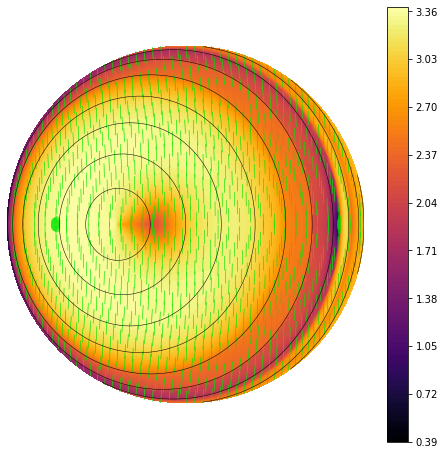

In [12]:
pfield_test

In [13]:
# calculate the mean intensity over the surface for a range of photon energies
pfield_test.calcvalues(mysurfmodel,gtt=(1-2*2.0/10.0)**0.5)
ivec=pfield_test.iint
qvec=pfield_test.qint


## Let's do some plots

In [14]:
# load a datafile
datae,dataf=np.loadtxt('4U_0142+614.dat',unpack=True,usecols=(0,1))

In [15]:
# get the mean intensities and energy bins for the orientation
ee=pfield_test.ebins
# load a file with the interstellar absorption model
eabs,sabs=np.loadtxt('tbabs.dat',unpack=True)
sabs=sabs
ii=np.argsort(eabs)
eabs=eabs[ii]
sabs=sabs[ii]
# absorption cross-section per hydrogen atom in units of 1e-24 cm^2 for our energy bins
ssabs=np.interp(ee,eabs,sabs)/(ee)**3*1e-24
# the best-fit hydrogen column is 0.52e22 /cm2
totabs=np.exp(-0.45e22*ssabs)

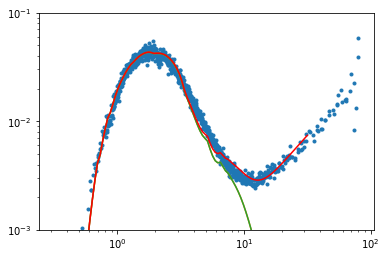

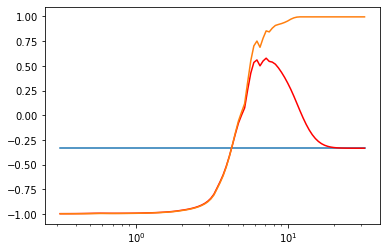

In [16]:
# plot the model against the data
mm=np.interp(datae,ee,totabs*ee*ivec) 
norm=np.mean(dataf[(datae>1) & (datae<4)])/np.mean(mm[(datae>1) & (datae<4)])

plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*ee*ivec*norm)
plt.loglog(ee,totabs*ee*ivec*norm)
#plt.loglog(ee,totabs*(ee*ivec*norm+ee*ivec2*0.001))
plt.loglog(ee,totabs*(ee*ivec*norm+ee**1.3/1.2e4),'r')
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec*ee*norm)/(ivec*norm*ee+ee**1.3/1.2e4),'r')
plt.plot(ee,qvec/ivec)
#plt.plot([ee[0],ee[-1]],[-1.0,-1.0],'k')
plt.xscale("log")
plt.ylim(-1.1,1.1)
plt.show()

# Work with all orientations

## Load the orientation files

In [17]:
import glob
pfieldarray_test=Magnetar.pfield_array().loaddata(glob.glob('Sample_Pfields/pfield_models_QED/*'))

## Calculate the mean intensities for all orientations and energies

In [18]:
pfieldarray_test.calcvalues(mysurfmodel,gtt=(1-2*2.0/10.0)**0.5)

In [19]:
print(pfieldarray_test)


#
# class pfield
#
# filename      Sample_Pfields/pfield_models_QED/pfield_5keV_0.deg
#
#   Phi[rad]  Energy[keV]            I          Q/I
           0     0.316228      454.866  9.66982e-09
           0     0.331285       441.37  9.79211e-09
           0      0.34706      427.203  9.82583e-09
           0     0.363585      415.184  9.79085e-09
           0     0.380897      398.467  9.72869e-09
           0     0.399034      381.006  9.74845e-09
           0     0.418034      355.675   9.7747e-09
           0      0.43794      337.017  9.86575e-09
           0     0.458792      315.016  1.00558e-08
           0     0.480638      300.592  1.00119e-08
           0     0.503524      287.659  9.66001e-09
           0       0.5275      277.929   8.9853e-09
           0     0.552617       284.48   8.3356e-09
           0      0.57893      296.498  7.87901e-09
           0     0.606496      336.878  7.89987e-09
           0     0.635375      379.623  8.01874e-09
           0     0.665629  

## Plot the mean intensity over the orientations

In [20]:
ivec=[pf.iint  for pf in pfieldarray_test.pfi]
qvec=[pf.qint  for pf in pfieldarray_test.pfi]
ee=pfieldarray_test.pfi[0].ebins

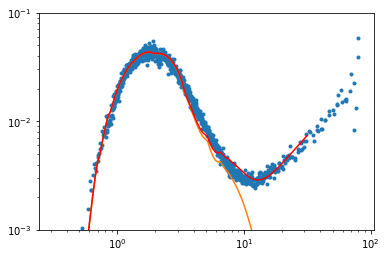

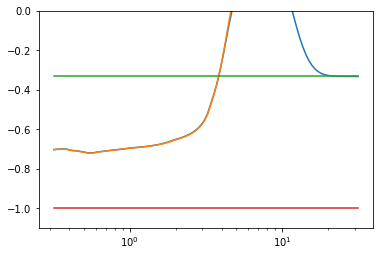

In [21]:
totivec = (ivec[0]+ivec[1]+ivec[2]+ivec[3]+ivec[4]+ivec[5]+ivec[6])/7
totqvec = (qvec[0]+qvec[1]+qvec[2]+qvec[3]+qvec[4]+qvec[5]+qvec[6])/7
mm=np.interp(datae,ee,totabs*ee*totivec) 
norm=np.mean(dataf[(datae>1) & (datae<4)])/np.mean(mm[(datae>1) & (datae<4)])

plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*totivec*ee*norm)
plt.loglog(ee,totabs*(totivec*ee*norm+ee**1.3/1.2e4),'r')
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot(ee,(-ee**1.3/1.2e4/3+ee*totqvec*norm)/(ee*totivec*norm+ee**1.3/1.2e4))
plt.plot(ee,totqvec/totivec)
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot([ee[0],ee[-1]],[-1.0,-1.0])
plt.xscale("log")
plt.ylim(-1.1,0)
plt.show()

## Plot the intensity for several orientations

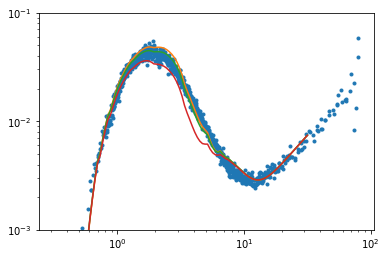

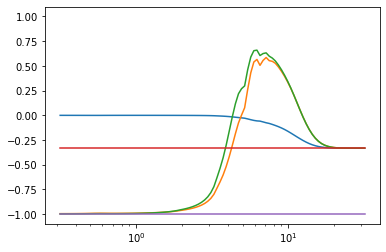

In [22]:
plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*(ee*ivec[0]*norm+ee**1.3/1.2e4))
plt.loglog(ee,totabs*(ee*ivec[3]*norm+ee**1.3/1.2e4))
plt.loglog(ee,totabs*(ee*ivec[6]*norm+ee**1.3/1.2e4))
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot(ee,(-ee**1.3/1.2e4/3+ee*qvec[0]*norm)/(ee*ivec[0]*norm+ee**1.3/1.2e4))
plt.plot(ee,(-ee**1.3/1.2e4/3+ee*qvec[3]*norm)/(ee*ivec[3]*norm+ee**1.3/1.2e4))
plt.plot(ee,(-ee**1.3/1.2e4/3+ee*qvec[6]*norm)/(ee*ivec[6]*norm+ee**1.3/1.2e4))
#plt.plot(ee,totqvec/totivec)
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot([ee[0],ee[-1]],[-1.0,-1.0])
plt.xscale("log")
plt.ylim(-1.1,1.1)
plt.show()

# Experiment with QED-on and QED-off

## Load a QED-off propagation model

In [32]:
pf30=Magnetar.pfield().loaddata('Sample_Pfields/pfield_models_noQED/pfield_noQED_30')
pf30.recalculate(5,mysurfmodel)

(1620.2060306099168, -505.5282319262898)

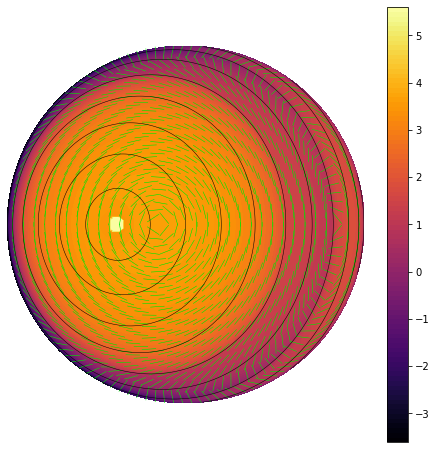

In [33]:
q=pf30.plot(datamap=np.log10(pf30.data['X']+pf30.data['O']),cmap='inferno',ellipsecolor=[0,0.9,0])
q.savefig('HS30NoQED.pdf',bbox_inches='tight')

## Load a QED-on propagation model

In [34]:
pf30Q=Magnetar.pfield().loaddata('Sample_Pfields/pfield_models_QED/pfield_5keV_30deg')
pf30Q.recalculate(5,mysurfmodel)


(1619.7710294409756, -1618.1510361684545)

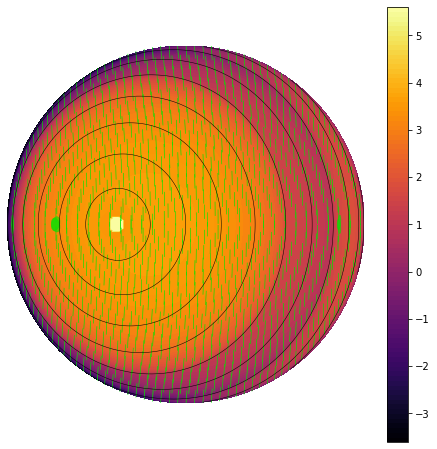

In [35]:
q=pf30Q.plot(datamap=np.log10(pf30Q.data['X']+pf30Q.data['O']),cmap='inferno',ellipsecolor=[0,0.9,0])
q.savefig('HS30.pdf',bbox_inches='tight')